In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import fitsio
import desimodel.io
import desitarget.mtl
from desitarget.targetmask import desi_mask, obsconditions
from collections import Counter
%matplotlib inline

In [2]:
data_path = "/global/cscratch1/sd/forero/DR8FiberAssign/"

In [43]:
# read footprint
tiles = Table.read(data_path+"footprint/tiles_dark_gray_time_north.fits")
tiles

TILEID,RA,DEC,PASS,IN_DESI,EBV_MED,AIRMASS,STAR_DENSITY,EXPOSEFAC,PROGRAM,OBSCONDITIONS
int32,float64,float64,int16,int16,float32,float32,float32,float32,str6,int32
100,270.0,31.72,0,1,0.0465025,1.02522,6844.66,1.36899,DARK,1
102,180.0,58.28,0,1,0.0182946,1.1349,1524.16,1.3093,DARK,1
104,148.28,0.0,0,1,0.0459285,1.22024,2022.76,1.69598,DARK,1
106,211.72,0.0,0,1,0.043047,1.22024,1874.92,1.6665,DARK,1
115,225.0,35.26,0,1,0.0137431,1.02592,1716.64,1.12255,DARK,1
119,135.0,35.26,0,1,0.0299883,1.02592,1952.38,1.23917,DARK,1
120,249.09,0.0,0,1,0.103299,1.22024,6292.59,2.40444,DARK,1
121,270.0,69.09,0,1,0.042152,1.27073,3484.75,1.74361,DARK,1
125,180.0,20.91,0,1,0.0292052,1.04772,1207.09,1.26613,DARK,1


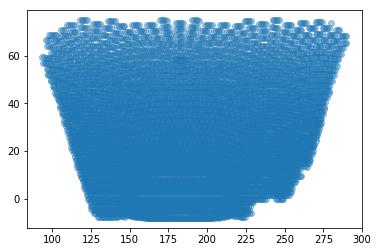

In [44]:
plt.scatter(tiles['RA'], tiles['DEC'],alpha=0.4)

In [45]:
ii = (tiles['RA']>150) & (tiles['RA']<200) & (tiles['DEC']>20) & (tiles['DEC']<40)
print(np.count_nonzero(ii))
selected_tiles = tiles[ii]

618


In [46]:
for i_enum, i_tile in enumerate(selected_tiles['TILEID']):
    # read fiberassign file from the last tile
    fa_file_name = os.path.join(data_path, "fiberassign/dark_north_fiberassign/fiberassign_{:06d}.fits".format(i_tile))
    fa_data = Table.read(fa_file_name, 'FASSIGN')
    print(i_enum, i_tile)

0 125
1 136
2 1108
3 1109
4 1110
5 1126
6 1127
7 1128
8 1129
9 1146
10 1147
11 1148
12 1149
13 1163
14 1164
15 1165
16 2745
17 2746
18 2765
19 2766
20 2767
21 2781
22 2782
23 2783
24 2795
25 2796
26 2805
27 2806
28 2813
29 2817
30 2913
31 2914
32 2915
33 2916
34 2931
35 2932
36 2933
37 2934
38 2935
39 2936
40 2937
41 2938
42 2950
43 2951
44 2952
45 2953
46 2954
47 2955
48 2956
49 2957
50 2958
51 2966
52 2967
53 2968
54 2969
55 2970
56 2971
57 2972
58 2973
59 2974
60 2975
61 2979
62 2980
63 2981
64 2982
65 2983
66 2984
67 2985
68 2986
69 2987
70 2988
71 2989
72 2990
73 2991
74 2992
75 2993
76 2994
77 2995
78 2996
79 2997
80 2998
81 2999
82 3000
83 3001
84 3002
85 3003
86 3004
87 3005
88 3006
89 3007
90 3201
91 3223
92 5310
93 5311
94 5312
95 5313
96 5330
97 5331
98 5332
99 5383
100 5384
101 5385
102 5401
103 5402
104 5403
105 5404
106 5421
107 5422
108 5423
109 5424
110 5438
111 5439
112 5440
113 5452
114 5453
115 5454
116 5463
117 5464
118 5471
119 5472
120 5476
121 5887
122 5898
123 6

Text(0.5,1,'617 tiles from DR8')

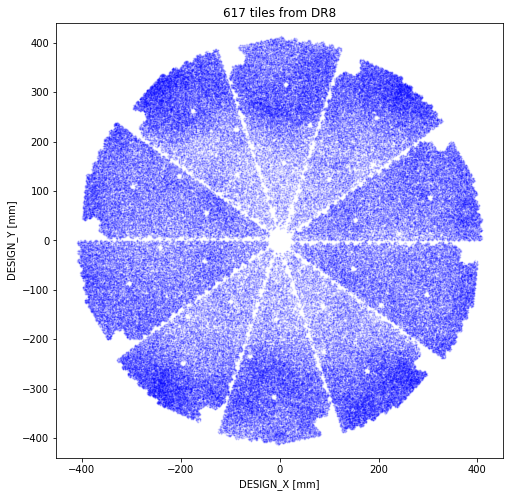

In [48]:
plt.figure(figsize=(8,8))
for i_enum, i_tile in enumerate(selected_tiles['TILEID']):
    # read fiberassign file from the last tile
    fa_file_name = os.path.join(data_path, "fiberassign/dark_north_fiberassign/fiberassign_{:06d}.fits".format(i_tile))
    fa_data = Table.read(fa_file_name, 'FASSIGN')
    is_sky = ((fa_data['FA_TARGET'] & sky_bits)!=0) & (fa_data['DEVICE_TYPE']=='POS')
    plt.scatter(fa_data['DESIGN_X'][is_sky], fa_data['DESIGN_Y'][is_sky], s=0.5, color='blue', alpha=0.1)
plt.axis('equal')
plt.xlabel('DESIGN_X [mm]')
plt.ylabel('DESIGN_Y [mm]')
plt.title('{} tiles from DR8'.format(i_enum))

In [5]:
# read fiberassign file from the last tile
fa_file_name = os.path.join(data_path, "fiberassign/dark_north_fiberassign/fiberassign_{:06d}.fits".format(tiles['TILEID'][-1]))
fa_data = Table.read(fa_file_name, 'FASSIGN')
fa_data

FIBER,TARGETID,LOCATION,FIBERSTATUS,LAMBDA_REF,PETAL_LOC,DEVICE_LOC,DEVICE_TYPE,TARGET_RA,TARGET_DEC,FA_TARGET,FA_TYPE,DESIGN_X,DESIGN_Y,DESIGN_Q,DESIGN_S
int32,int64,int32,int32,float32,int16,int32,str3,float64,float64,int64,uint8,float32,float32,float32,float32
0,35185780078938756,95,0,5400.0,0,95,POS,250.936542006,0.713545531155,131074,1,-4.0556,-175.662,268.677,175.751
1,35185780083135216,62,0,5400.0,0,62,POS,251.1204404,0.796619430272,131074,1,-49.0824,-155.108,252.441,162.721
2,35185780083131315,102,0,5400.0,0,102,POS,251.10359317,0.651827392956,131074,1,-45.1059,-191.19,256.725,196.498
3,611646532386553978,82,0,5400.0,0,82,POS,251.047449339,0.712846296751,4294967296,4,-31.2555,-175.882,259.923,178.682
4,35185774039145121,131,0,5400.0,0,131,POS,250.889401921,0.60019070869,131074,1,7.52385,-204.048,272.112,204.255
5,35185780078937596,108,0,5400.0,0,108,POS,250.850532137,0.676568320803,2305843052163366912,3,17.0482,-184.908,275.268,185.742
6,35185780078936750,119,0,5400.0,0,119,POS,250.900689911,0.647978257295,1152921504606846976,1,4.74204,-192.05,271.414,192.164
7,35185780083135407,64,0,5400.0,0,64,POS,251.004796535,0.800843123632,393222,1,-20.7513,-153.978,262.325,155.399
8,35185780083133844,72,0,5400.0,0,72,POS,251.064859711,0.74396785086,131074,1,-35.5021,-168.141,258.077,171.888


In [9]:
sky_bits = desi_mask.SKY | desi_mask.BAD_SKY
std_bits = desi_mask.STD_FAINT | desi_mask.STD_BRIGHT | desi_mask.STD_WD

is_sky = (fa_data['FA_TARGET'] & sky_bits)!=0
is_std = (fa_data['FA_TARGET'] & std_bits)!=0

is_pos = (fa_data['DEVICE_TYPE']=='POS')
is_science_only = (fa_data['FA_TYPE'] == 1)
print(set(fa_data['FA_TYPE']))
print(np.count_nonzero(is_std))
print(np.count_nonzero(is_sky&is_pos))
print(np.count_nonzero(is_science_only))

{1, 2, 3, 4, 8}
125
401
4474


Text(0,0.5,'DEC')

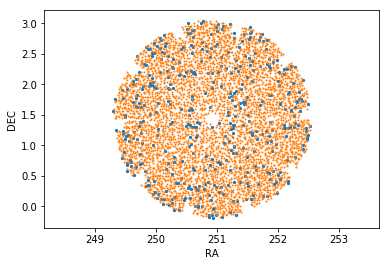

In [7]:
plt.scatter(fa_data['TARGET_RA'][is_sky], fa_data['TARGET_DEC'][is_sky], s=5.0)
plt.scatter(fa_data['TARGET_RA'][is_science_only], fa_data['TARGET_DEC'][is_science_only], s=1.0)
_= plt.axis('equal')
plt.xlabel('RA')
plt.ylabel('DEC')